## Artificial NN

### Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5], [3, 1]])
y_pred

array([False, False])

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5053326657968679

## Keras

### Classification

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train[0]]

'Ankle boot'

In [8]:
# build NN
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
# list of layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer('dense_3') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02058198, -0.03474764, -0.01347983, ..., -0.06052219,
        -0.06867144, -0.05451724],
       [-0.02807382, -0.04232975, -0.04686759, ..., -0.06167791,
         0.01987773, -0.06496764],
       [ 0.01417042, -0.01970718,  0.04922875, ..., -0.05871091,
        -0.04659528, -0.02024686],
       ...,
       [-0.0362743 , -0.05519007,  0.02218658, ..., -0.05874714,
        -0.0120622 ,  0.06260148],
       [-0.06160312, -0.0311837 ,  0.0340565 , ..., -0.03142825,
         0.02516684, -0.0214487 ],
       [-0.05867107,  0.00267413,  0.00292552, ...,  0.02641109,
         0.01100481,  0.01033109]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6755 - loss: 1.0076 - val_accuracy: 0.8312 - val_loss: 0.5103
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8248 - loss: 0.5131 - val_accuracy: 0.8412 - val_loss: 0.4549
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8405 - loss: 0.4563 - val_accuracy: 0.8454 - val_loss: 0.4329
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8510 - loss: 0.4246 - val_accuracy: 0.8514 - val_loss: 0.4174
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8584 - loss: 0.4024 - val_accuracy: 0.8540 - val_loss: 0.4044
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8640 - loss: 0.3854 - val_accuracy: 0.8566 - val_loss: 0.3954
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8693 - loss: 0.3712 - val_accuracy: 0.8584 - val_loss: 0.3869
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8734 - loss: 0.3591 -

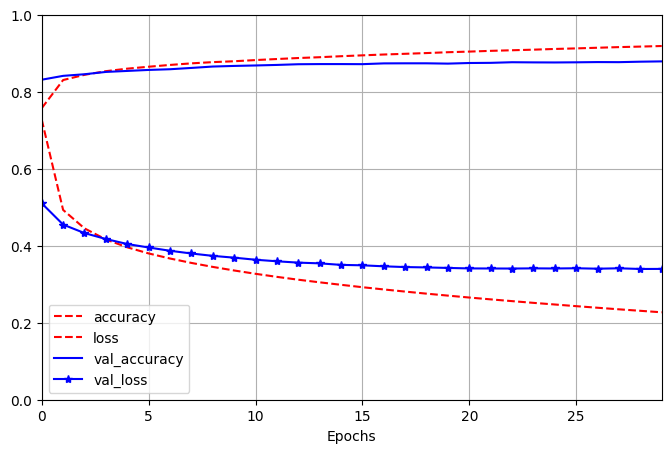

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epochs',
    style=['r--', 'r--', 'b-', 'b-*']
)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - loss: 0.3601


[0.35615450143814087, 0.8758000135421753]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.01, 0.  , 0.86],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Regression

In [30]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - RootMeanSquaredError: 3.0623 - loss: 9.4577 - val_RootMeanSquaredError: 2.9024 - val_loss: 8.4242
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredError: 2.8846 - loss: 8.3209 - val_RootMeanSquaredError: 2.8988 - val_loss: 8.4030
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - RootMeanSquaredError: 2.8796 - loss: 8.2923 - val_RootMeanSquaredError: 2.8993 - val_loss: 8.4057
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - RootMeanSquaredError: 2.8777 - loss: 8.2815 - val_RootMeanSquaredError: 2.8999 - val_loss: 8.4097
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - RootMeanSquaredError: 2.8765 - loss: 8.2741 - val_RootMeanSquaredError: 2.8974 - val_loss: 8.3951
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredError: 2.8755 - loss: 8.2684 - val_RootMeanSquaredError: 2.8950 - val_loss: 8.3810
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - RootMeanSquaredE